## <center>LOAN CLASSIFICATION PROJECT

### 
HERE WE HAVE A CLASSIFICATION TYPE OF PROJECT WHICH DEALS WIH THE LOAN STATUS OF VARIOUS CUSTOMERS FROM DIFFRENT FINANCIAL BACKGROUNDS 

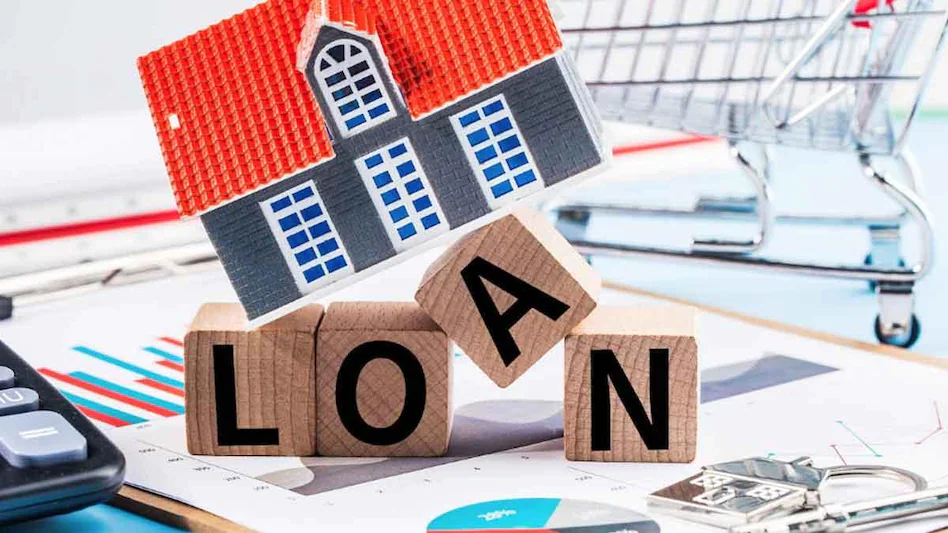

### DATASET DESCRIPTION
 here we have  these coloumnsGender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

source: kaggle

### LOADING DEPENDANCIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm  import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import klib as k
from mpl_toolkits.mplot3d import Axes3D
import os
import plotly.express as px
import plotly.io as pio
import itertools
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### LODING DATASET

In [2]:
data=pd.read_csv("loan_sanction_train.csv")


### EDA

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
k.clean_column_names(data)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
data.duplicated().sum()

0

<AxesSubplot:xlabel='loan_status', ylabel='count'>

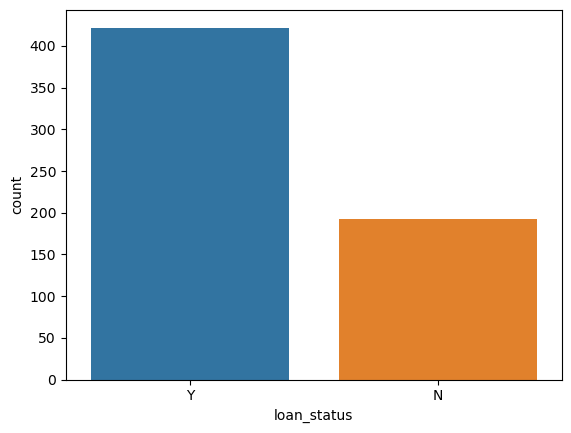

In [8]:
sns.countplot(x="loan_status", data=data)

<AxesSubplot:xlabel='self_employed', ylabel='count'>

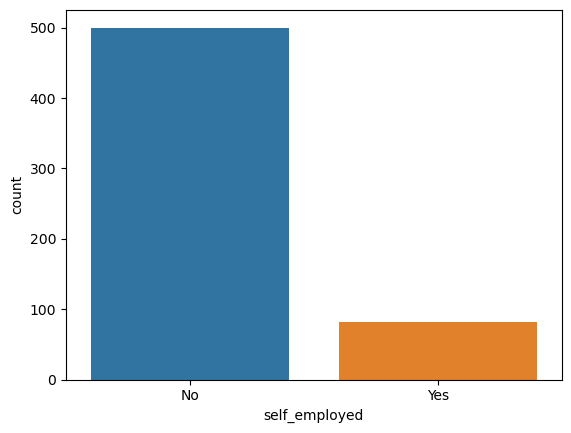

In [9]:
sns.countplot(x="self_employed", data=data)

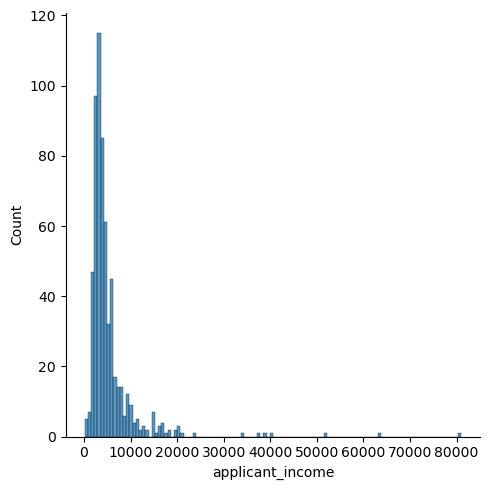

In [10]:
sns.displot(x="applicant_income", data=data)

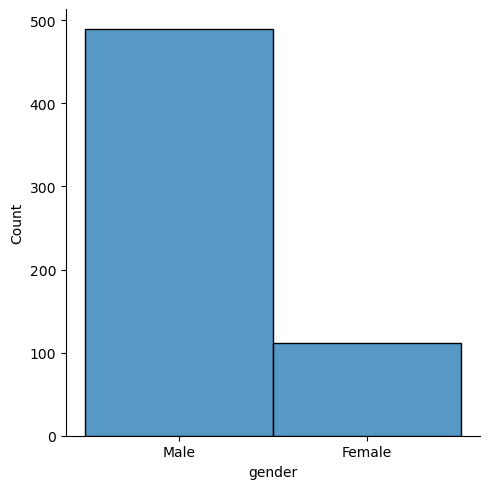

In [11]:
sns.displot(x="gender", data=data)

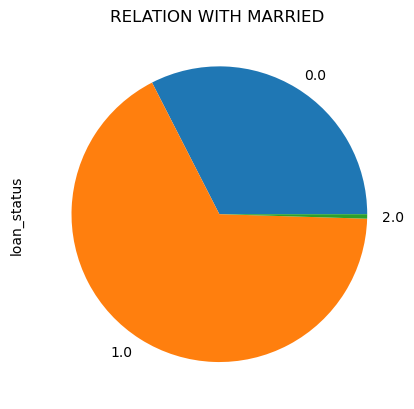

In [62]:
cut_price = data.groupby(['married'])['loan_status'].sum()
plt.title("RELATION WITH MARRIED ")
cut_price.plot.pie();

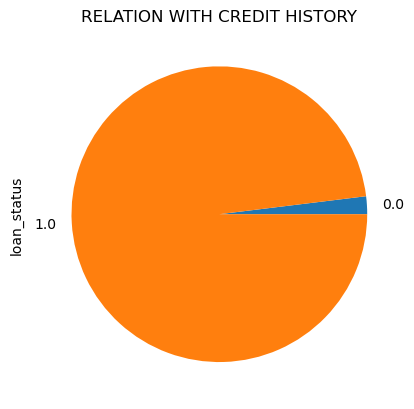

In [61]:
a = data.groupby(['credit_history'])['loan_status'].sum()
plt.title("RELATION WITH CREDIT HISTORY")
a.plot.pie();

<AxesSubplot:xlabel='loan_amount_term', ylabel='Density'>

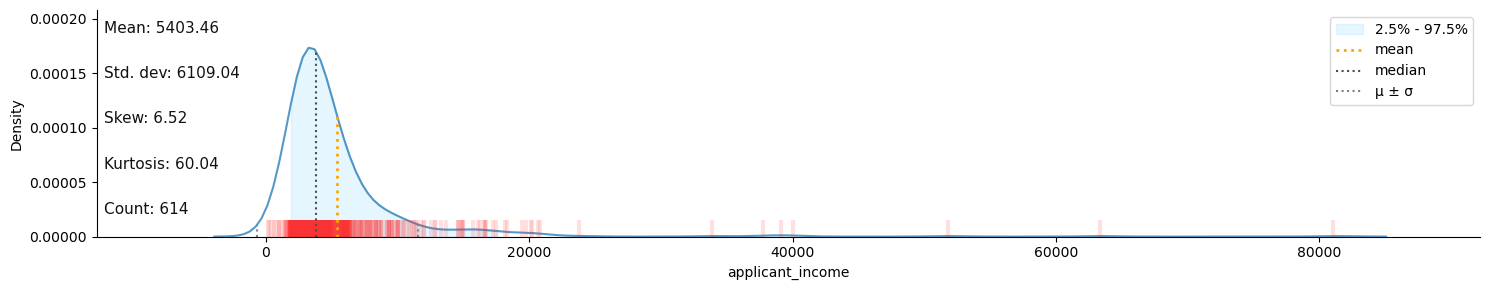

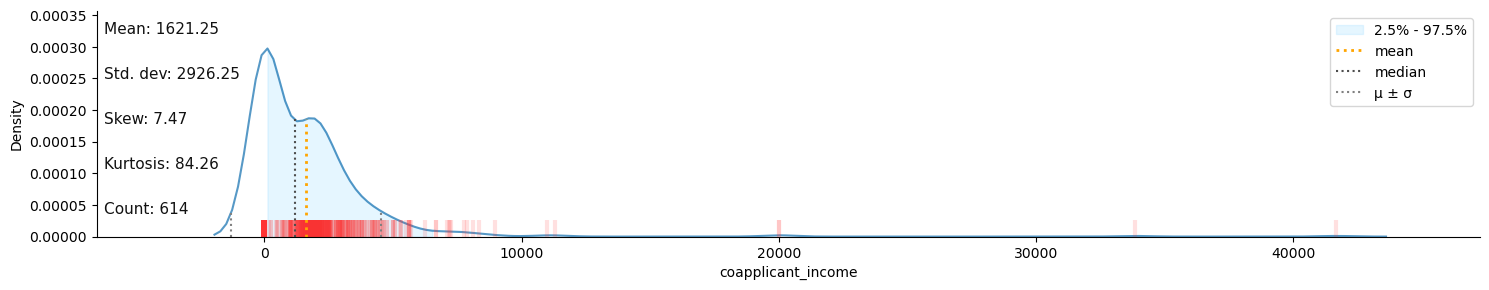

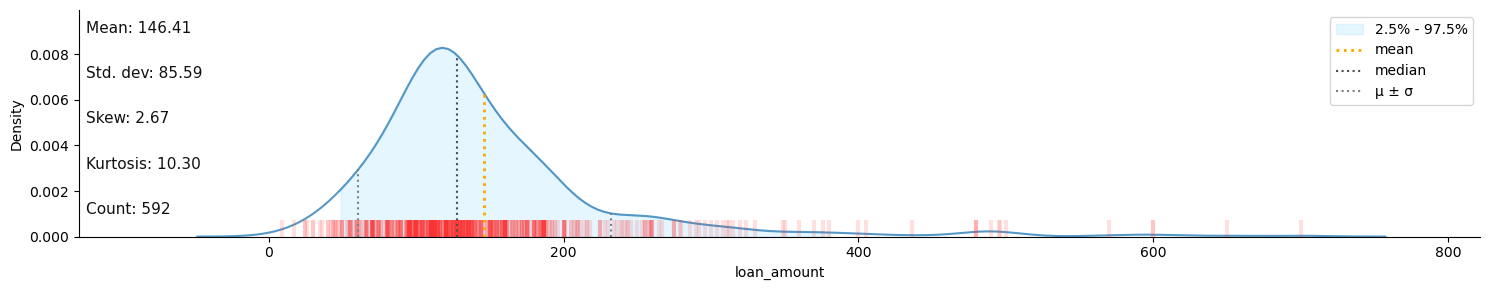

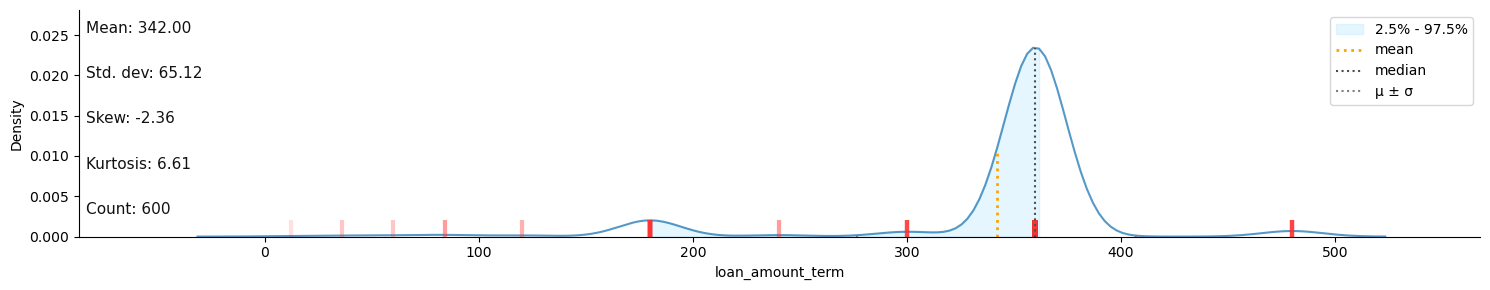

In [17]:
k.dist_plot(data)

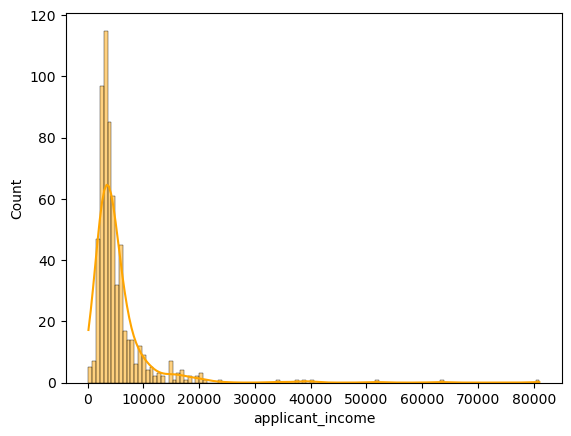

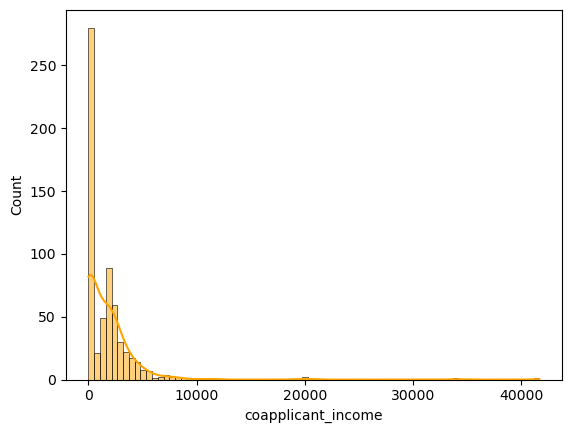

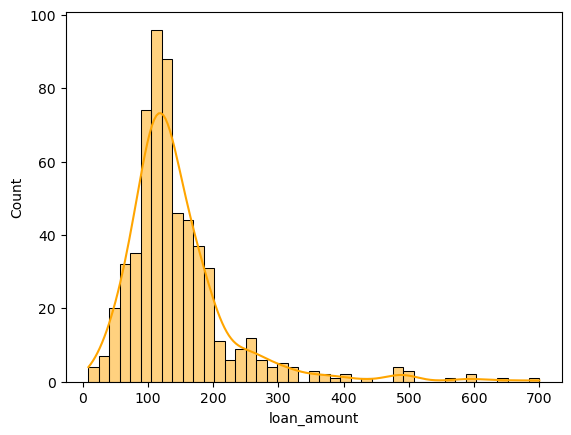

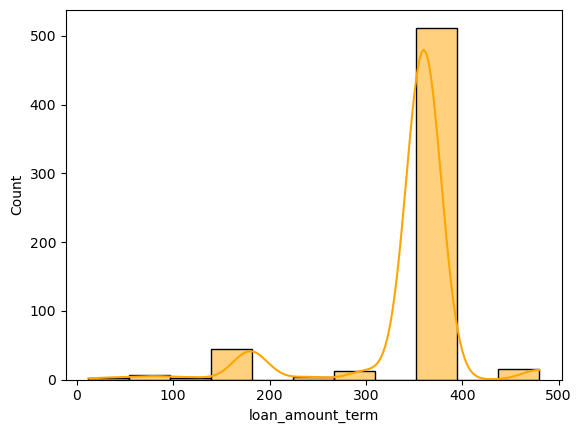

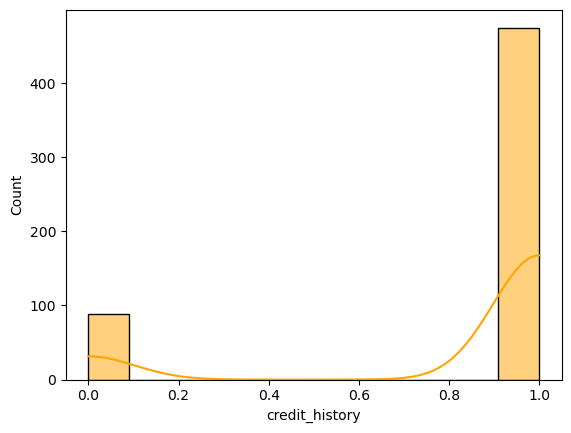

In [18]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.histplot(data, x=data[column], kde=True, color="orange")
        plt.show()

GridSpec(6, 8)

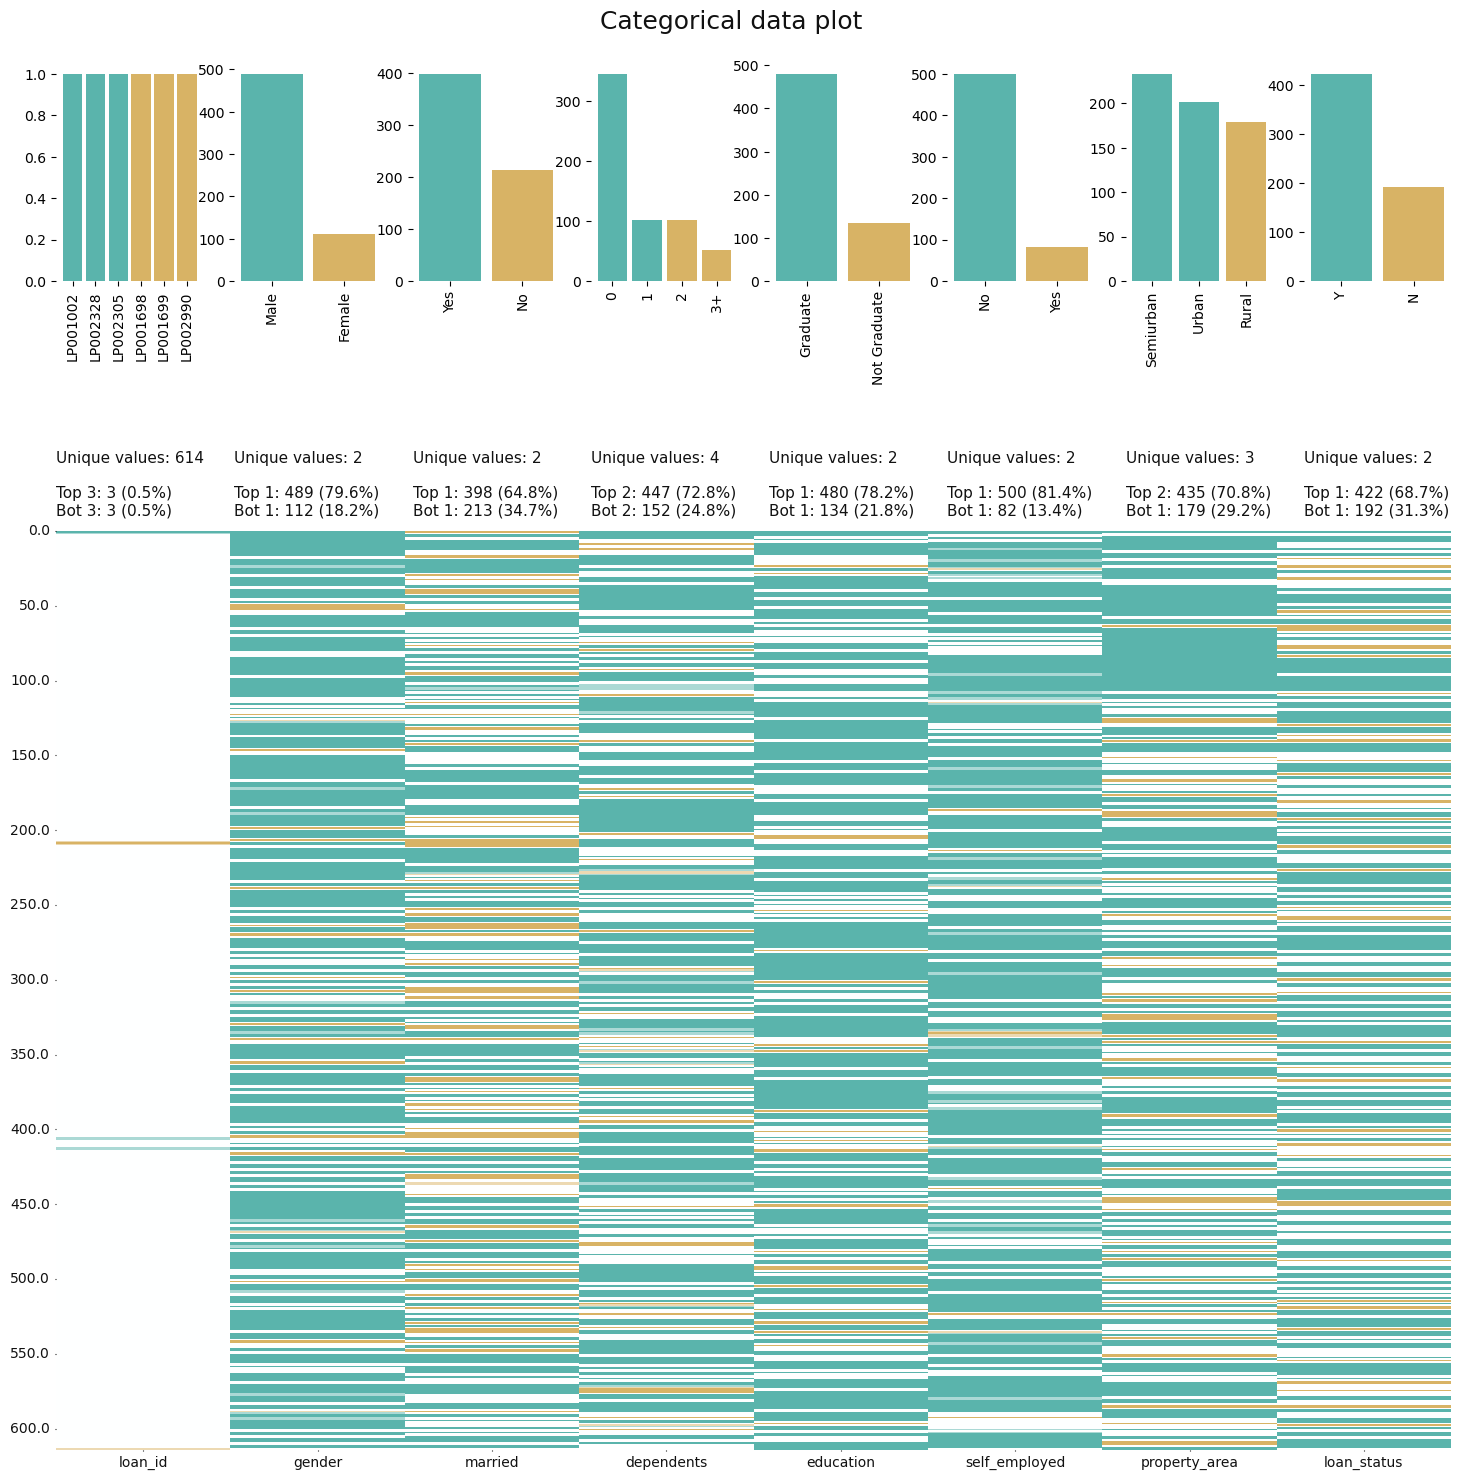

In [20]:
k.cat_plot(data)

### changing the  data type

In [21]:
le=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=le.fit_transform(data[i])
        


In [22]:
data

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [24]:
data.drop(columns="loan_id",inplace=True)

In [25]:
data.dropna(inplace=True)
data

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


### finding outlier

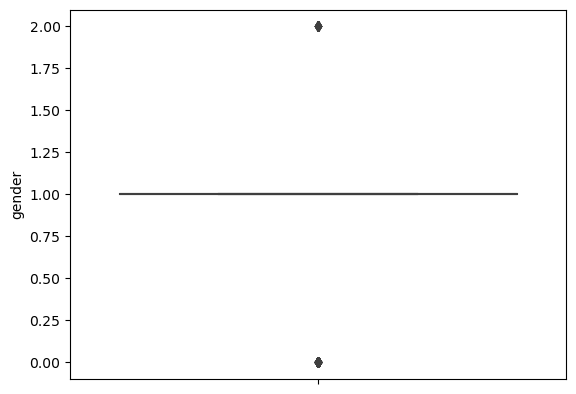

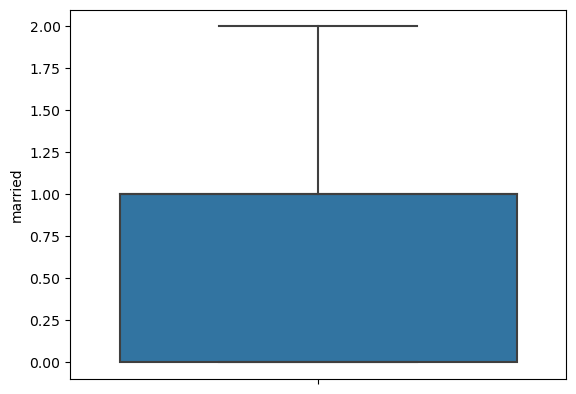

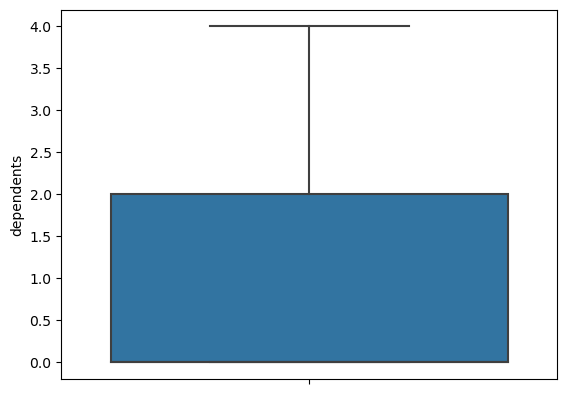

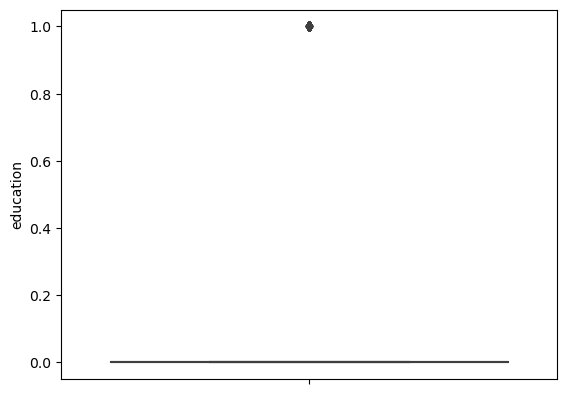

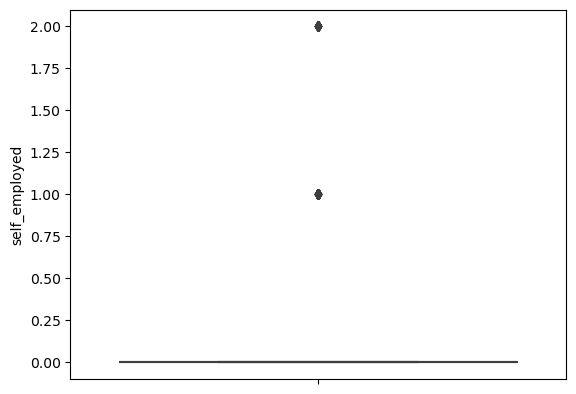

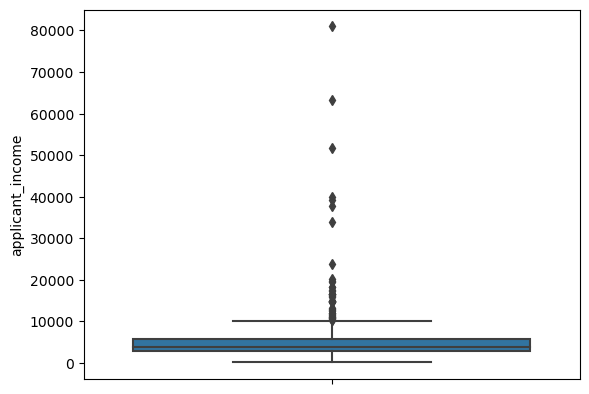

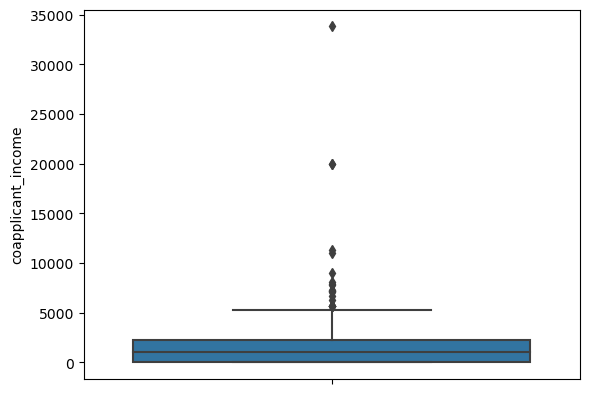

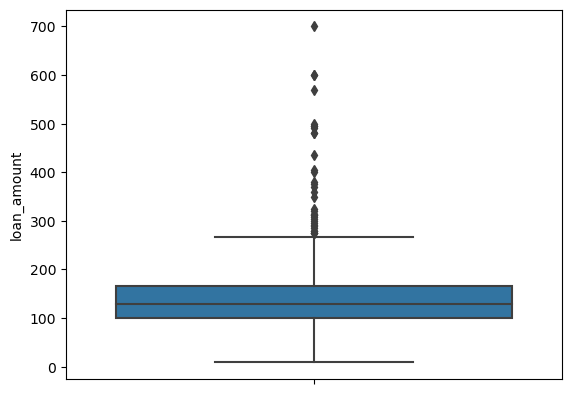

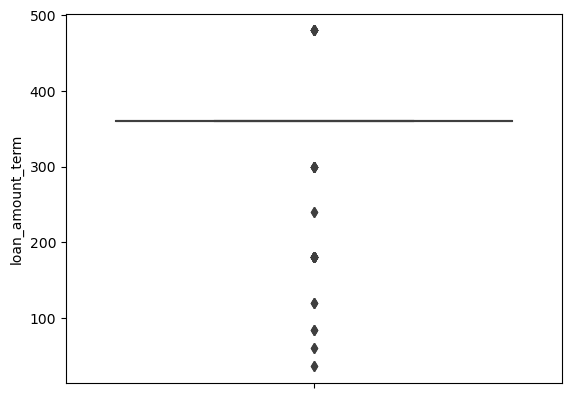

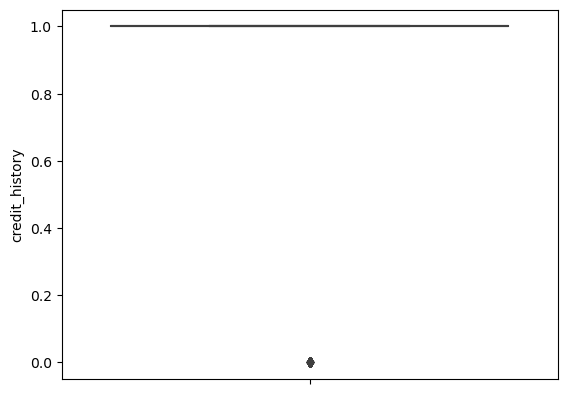

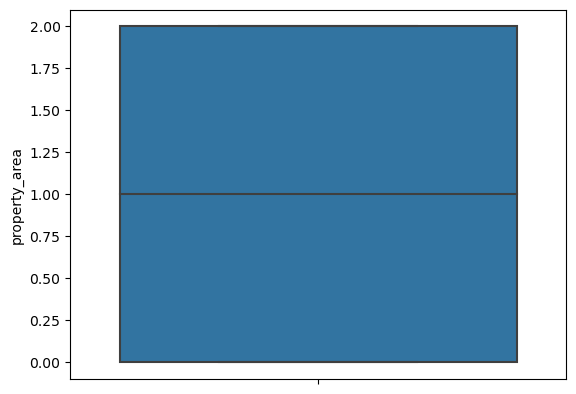

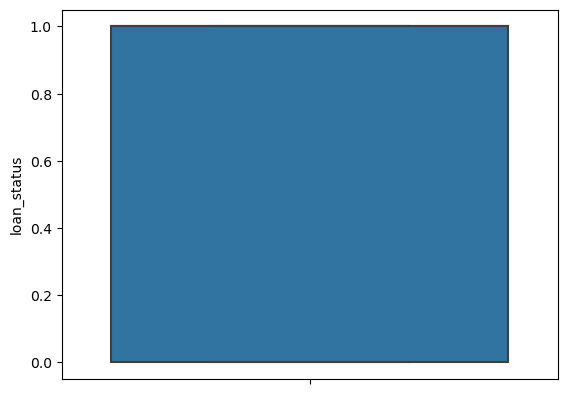

In [26]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column])
        plt.show()

### removing outlier

In [31]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [29]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

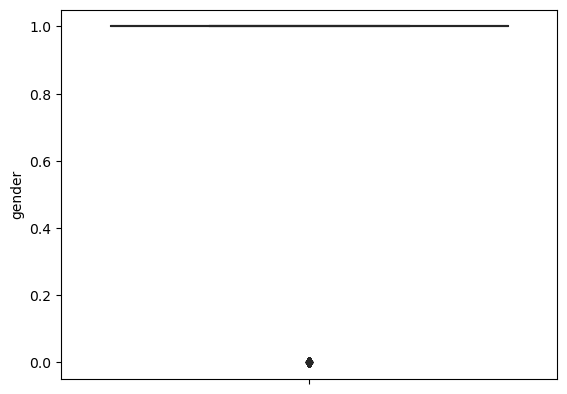

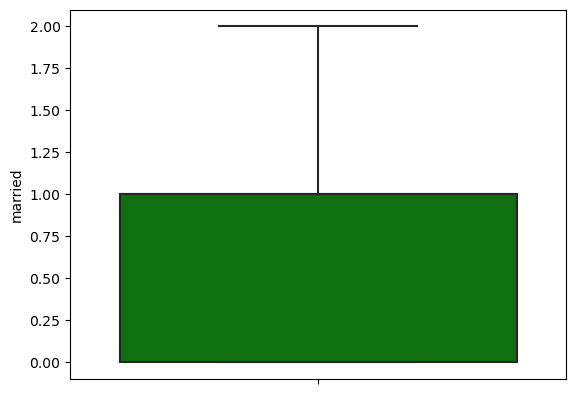

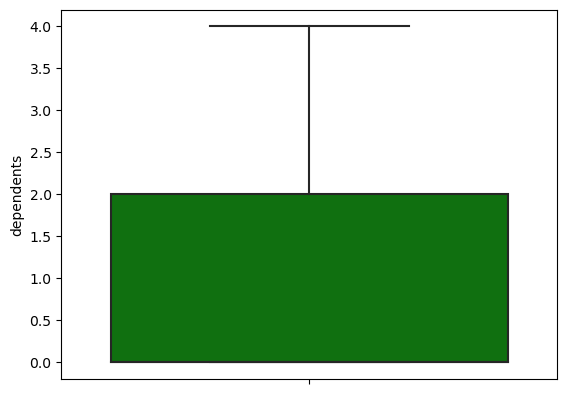

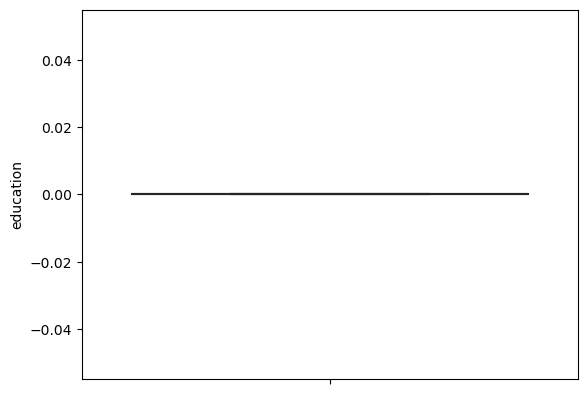

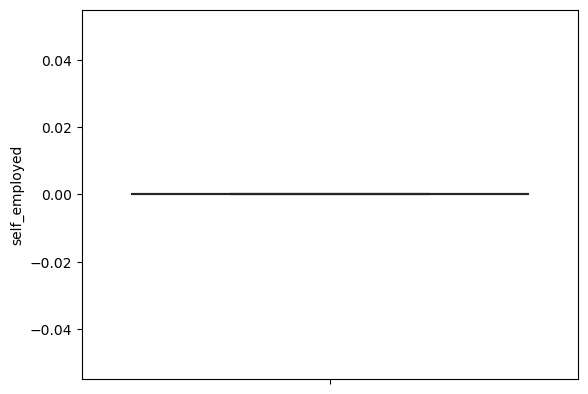

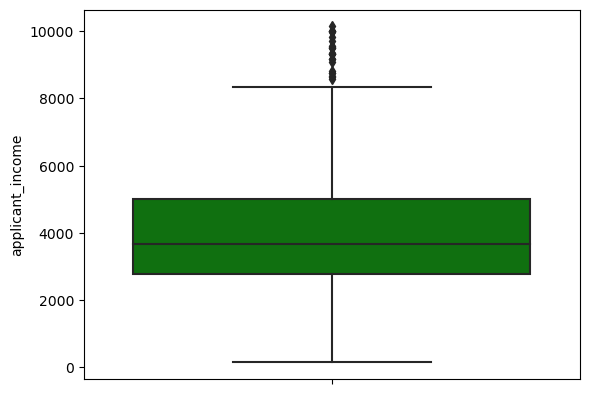

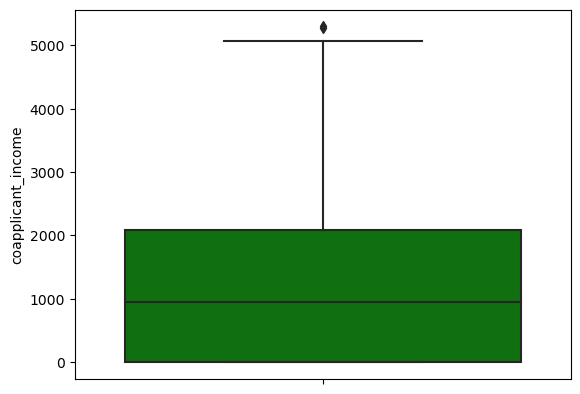

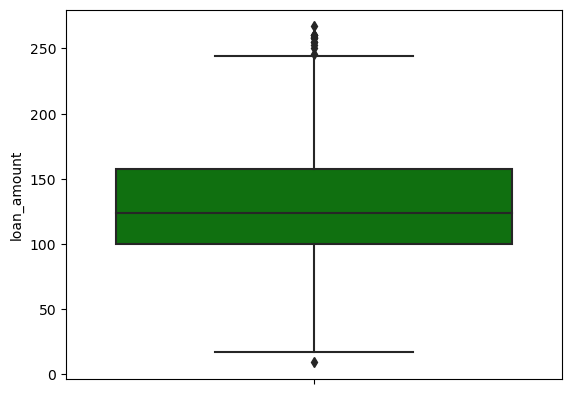

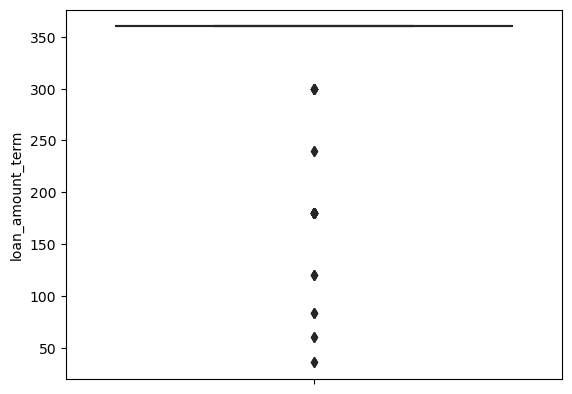

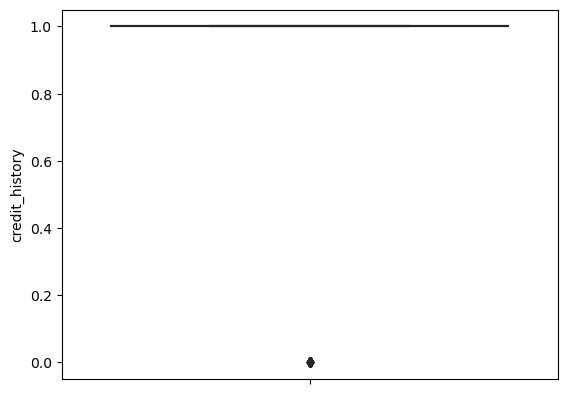

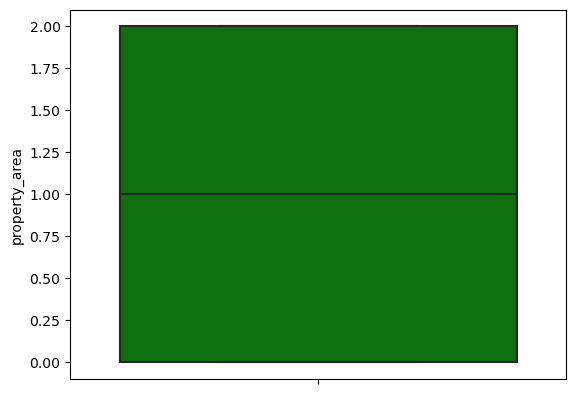

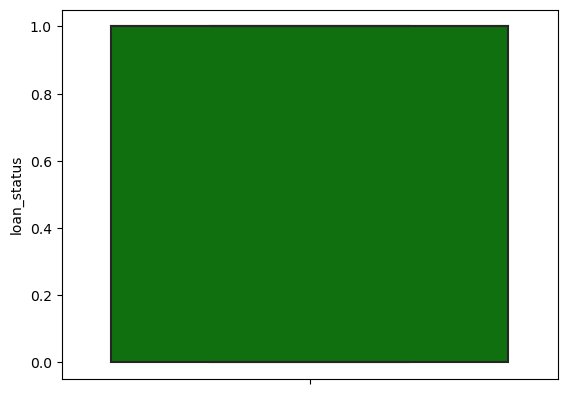

In [30]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column], color="green")
        plt.show()

In [32]:
data.isnull().mean()*100

gender                 2.268431
married                0.000000
dependents             0.000000
education             20.415879
self_employed         17.958412
applicant_income       8.506616
coapplicant_income     3.969754
loan_amount            6.616257
loan_amount_term       2.646503
credit_history         0.000000
property_area          0.000000
loan_status            0.000000
dtype: float64

In [33]:
data.dropna(inplace=True)

In [34]:
data.shape

(279, 12)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 1 to 612
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              279 non-null    float64
 1   married             279 non-null    float64
 2   dependents          279 non-null    float64
 3   education           279 non-null    float64
 4   self_employed       279 non-null    float64
 5   applicant_income    279 non-null    float64
 6   coapplicant_income  279 non-null    float64
 7   loan_amount         279 non-null    float64
 8   loan_amount_term    279 non-null    float64
 9   credit_history      279 non-null    float64
 10  property_area       279 non-null    float64
 11  loan_status         279 non-null    float64
dtypes: float64(12)
memory usage: 28.3 KB


In [36]:
data.sample(10)

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
157,1.0,1.0,1.0,0.0,0.0,9538.0,0.0,187.0,360.0,1.0,2.0,1.0
56,1.0,1.0,0.0,0.0,0.0,2132.0,1591.0,96.0,360.0,1.0,1.0,1.0
362,1.0,1.0,0.0,0.0,0.0,4750.0,2333.0,130.0,360.0,1.0,2.0,1.0
355,0.0,0.0,4.0,0.0,0.0,3813.0,0.0,116.0,180.0,1.0,2.0,1.0
299,1.0,1.0,1.0,0.0,0.0,2014.0,2925.0,113.0,360.0,1.0,2.0,0.0
289,1.0,0.0,0.0,0.0,0.0,9508.0,0.0,187.0,360.0,1.0,0.0,1.0
178,1.0,1.0,1.0,0.0,0.0,3750.0,0.0,116.0,360.0,1.0,1.0,1.0
310,0.0,0.0,0.0,0.0,0.0,2917.0,0.0,84.0,360.0,1.0,1.0,1.0
97,1.0,1.0,0.0,0.0,0.0,1977.0,997.0,50.0,360.0,1.0,1.0,1.0
321,1.0,1.0,3.0,0.0,0.0,4342.0,189.0,124.0,360.0,1.0,1.0,1.0


#### correlation matrix

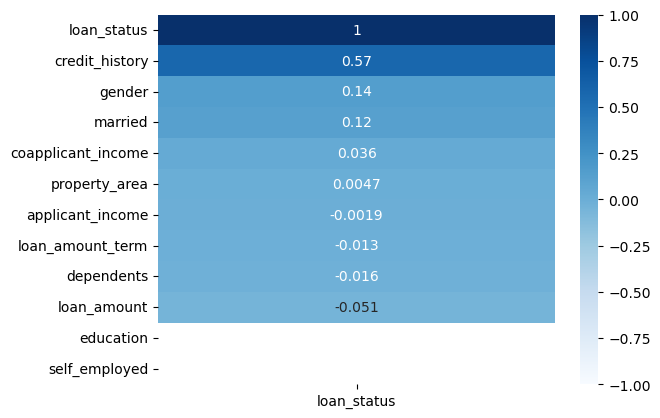

In [38]:
sns.heatmap(data.corr()[["loan_status"]].sort_values(by="loan_status", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

In [40]:
x = data[["credit_history","gender","married"]].values

In [41]:
y= data[["loan_status"]].values

In [42]:
sc=StandardScaler()

In [43]:
x= sc.fit_transform(x)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [45]:
models = {
    "LogisticRegression": LogisticRegression(),
  "Ridge":RidgeClassifier(),
    "SVC":SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()  
}

In [46]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LogisticRegression
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : SVC
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : DecisionTreeClassifier
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : GradientBoostingClassifier
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : AdaBoostClassifier
AVERAGE RMSE:  0.38240028165112006
*************************************

In [48]:
model = DecisionTreeClassifier()

In [49]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with DecisionTreeClassifier()
Model accuracy on train is::  0.8385650224215246
Model accuracy on test is::  0.875
confusion_matrix train is::  [[ 29  33]
 [  3 158]]
confusion_matrix test is::  [[ 5  6]
 [ 1 44]]
Wrong Predictions made: 820 / 3136
************************************************************


In [56]:
y_pred=model.predict(x)

<AxesSubplot:>

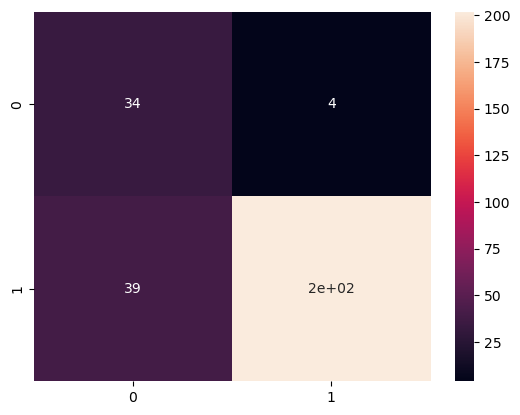

In [58]:
sns.heatmap(confusion_matrix(y_pred,y),annot=True)

In [50]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [51]:
OUTPUT.sample(30)

,ACTUAL,PREDICTION
183,1,1
189,1,1
4,1,1
85,1,1
114,0,1
118,1,1
244,1,1
167,0,1
265,0,1
13,0,1


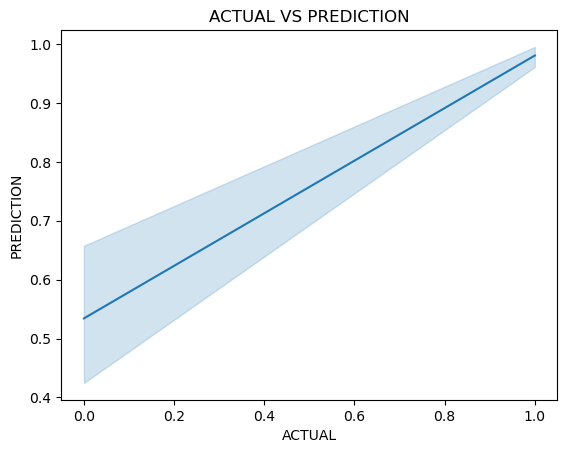

In [52]:
sns.lineplot(x='ACTUAL', y='PREDICTION', data=OUTPUT)
plt.title('ACTUAL VS PREDICTION')
plt.show()

Model used is::  DecisionTreeClassifier()


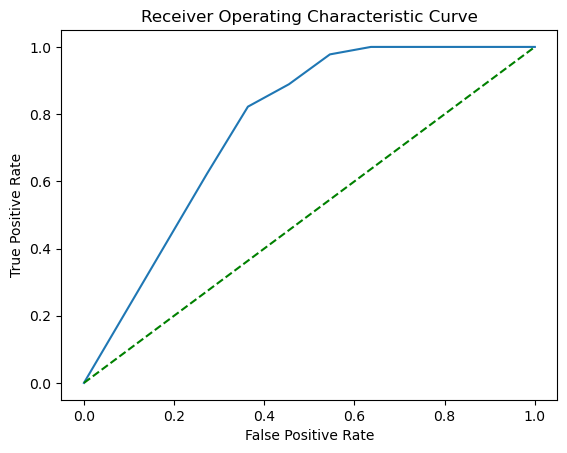

In [53]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("Model used is:: ", model)
sns.lineplot(x=fpr, y=tpr)
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

### 
we have cleaned,preprocessed and visualized the data set  and we have done several classification on it and we concluded that 
credit history,gender,maritial status of people are most effecting factors of loan approval.

